Challenge Set 3: Linear Regression and Train/Test Split

Data used is 2013_movies.csv

___

## Exercise 3.1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%pylab inline
from sklearn.cross_validation import train_test_split
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [29]:
!ls

2013_movies.csv      Challenge3Will.ipynb pairprogramming.py


In [30]:
movie_data = pd.read_csv('2013_movies.csv')

In [31]:
movie_data.columns

Index([u'Title', u'Budget', u'DomesticTotalGross', u'Director', u'Rating',
       u'Runtime', u'ReleaseDate'],
      dtype='object')

In [32]:
movie_data.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


### Predicting Rating vs. DomesticTotalGross

In [41]:
# movie_data = movie_data.dropna()

In [34]:
movie_data['constant'] = 1

In [35]:
X = movie_data['constant']
y = movie_data['DomesticTotalGross'] 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [37]:
model = smf.OLS(y, X)
fit1 = model.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Fri, 14 Oct 2016   Prob (F-statistic):                nan
Time:                        15:58:12   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant    1.035e+08   9.43e+06     10.975      0.000      8.48e+07  1.22e+08
==============================================================================
Omnibus:                       47.828   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.528
Skew:                           2.032   Prob(JB):                     1.11e-26
Kurtosis:                       7.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# lm1 = LinearRegression()
# lm1.fit(X_train, y_train)
# lm1.score(X_test, y_test)

In [39]:
# fit1.resid.plot(style='o', figsize=(12,8))

In [44]:
y_pred = fit1.predict(X)

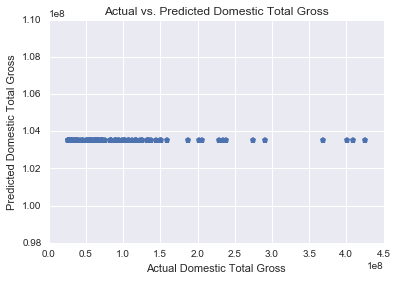

In [45]:
plt.plot(y, y_pred, 'p')
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs. Predicted Domestic Total Gross');

residual: the difference between the observed value and the depenent variable (y) and the predicted value (yhat)

In [46]:
residuals = y - y_pred

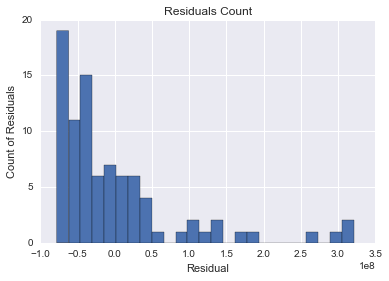

In [47]:
plt.hist(residuals, bins = 25)
plt.xlabel('Residual')
plt.ylabel('Count of Residuals')
plt.title('Residuals Count')

Looking at the Domestic Total Gross and Predicted, our constant term does not help us. There is no relationship between the variables. 

With the residual histogram, the distribution is not Gaussian, and we are seeing a tail.

___

## Exercise 3.2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [65]:
X2 = movie_data[['constant', 'Budget']]
lm1 = smf.OLS(y, X2)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Fri, 14 Oct 2016   Prob (F-statistic):           1.19e-07
Time:                        16:11:26   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant    4.443e+07    1.3e+07      3.418      0.001      1.86e+07  7.03e+07
Budget         0.7831      0.135      5.782      0.000         0.514     1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Finding the residuals

In [ ]:
y_pred2 = fit1.predict(X2)

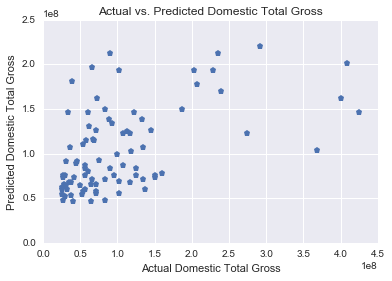

In [70]:
plt.plot(y, y_pred2, 'p')
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs. Predicted Domestic Total Gross');

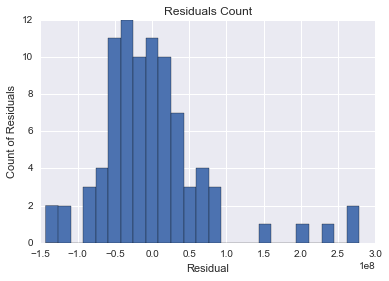

In [71]:
residuals = y - y_pred2
plt.hist(residuals, bins = 25)
plt.xlabel('Residual')
plt.ylabel('Count of Residuals')
plt.title('Residuals Count')

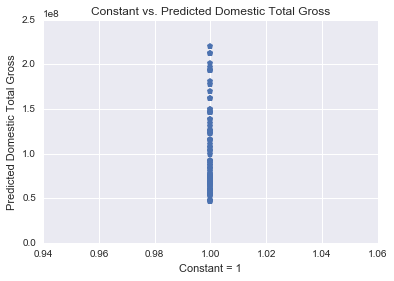

In [75]:
plt.plot(movie_data['constant'], y_pred2, 'p')
plt.xlabel('Constant = 1')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Constant vs. Predicted Domestic Total Gross');

In [78]:
# y_pred2

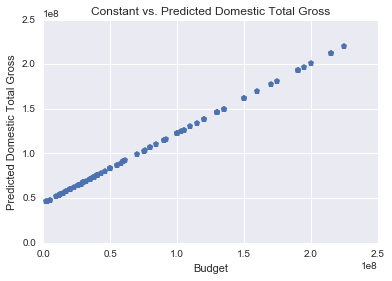

In [79]:
plt.plot(movie_data['Budget'], y_pred2, 'p')
plt.xlabel('Budget')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Constant vs. Predicted Domestic Total Gross');

There is a linear relationship between Budget and our Predicted Domestic Total Gross. This is because the constant is not changing, so our y_pred2 variable is found by predicting y_pred2

----

## Exercise 3.3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [80]:
X3 = movie_data[['constant', 'Budget', 'Rating']]
X3 = pd.get_dummies(X3, drop_first = True)

lm1 = smf.OLS(y, X3)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.13
Date:                Fri, 14 Oct 2016   Prob (F-statistic):           3.25e-06
Time:                        16:25:21   Log-Likelihood:                -1699.7
No. Observations:                  87   AIC:                             3407.
Df Residuals:                      83   BIC:                             3417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
constant      5.773e+07   2.51e+07      2.303      0.024      7.88e+06  1.08e+08
Budget           0.7806      0.156      5.005      0.000         0.470     1.091
Rating_PG-13 -1.711e+07   2.35e+07     -0.728      0.468     -6.38e+07  2.96e+07
Rating_R     -1.384e+07   2.57e+07     -0.539      0.591     -6.49e+07  3.72e+07
==============================================================================
Omnibus:                       36.518   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.882
Skew:                           1.529   Prob(JB):                     1.66e-18
Kurtosis:                       6.638   Cond. No.                     4.61e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
y_pred3 = fit1.predict(X3)

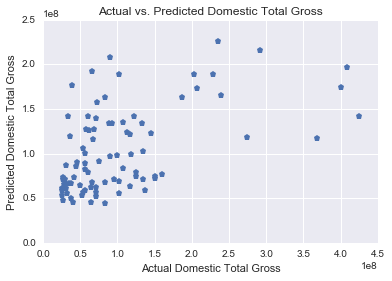

In [82]:
plt.plot(y, y_pred3, 'p')
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs. Predicted Domestic Total Gross');

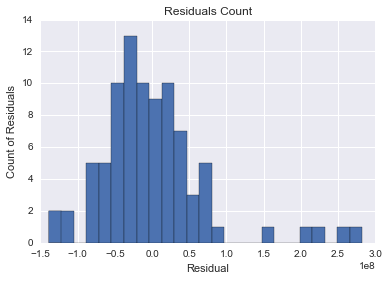

In [83]:
residuals = y - y_pred3
plt.hist(residuals, bins = 25)
plt.xlabel('Residual')
plt.ylabel('Count of Residuals')
plt.title('Residuals Count')

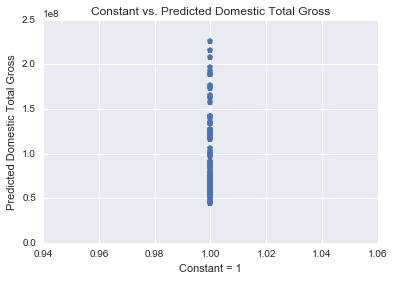

In [84]:
plt.plot(movie_data['constant'], y_pred3, 'p')
plt.xlabel('Constant = 1')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Constant vs. Predicted Domestic Total Gross');

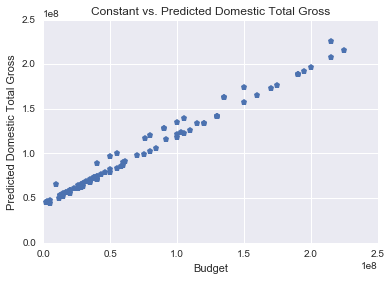

In [85]:
plt.plot(movie_data['Budget'], y_pred3, 'p')
plt.xlabel('Budget')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Constant vs. Predicted Domestic Total Gross');

The plots are similar to the previous question. We see our model has a bit less adjusted R-Squared from the previous question. The residual plots of predicted vs actual look similar to the plot before we added dummies. 

### Exercise 3.4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

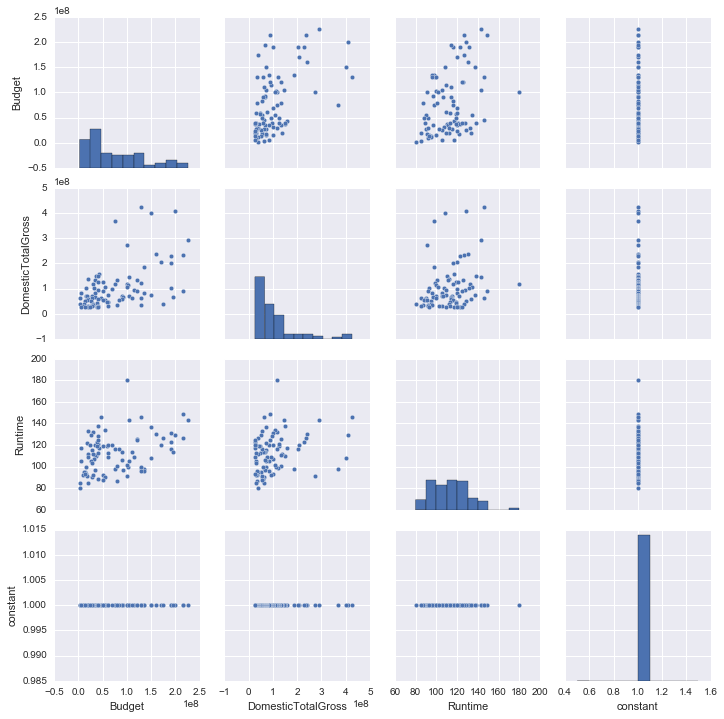

In [87]:
sns.pairplot(movie_data)

In [111]:
movie_data = pd.get_dummies(movie_data, columns=['Rating'])

In [112]:
# movie_data.ReleaseDate.value_counts()

In [113]:
# movie_data['month'] = movie_data.DatetimeIndex(movie_data['ReleaseDate']).month

In [114]:
movie_data.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Runtime                 int64
ReleaseDate            object
constant                int64
Rating_PG             float64
Rating_PG-13          float64
Rating_R              float64
dtype: object

In [115]:
# pd.get_dummies(movie_data['Rating', 'constant','Runtime','Budget'])

In [118]:
X4 = movie_data[['constant', 'Budget', 'Rating_PG','Rating_PG-13','Rating_R', 'Runtime']]

lm1 = smf.OLS(y, X4)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8.730
Date:                Fri, 14 Oct 2016   Prob (F-statistic):           6.38e-06
Time:                        16:42:13   Log-Likelihood:                -1699.0
No. Observations:                  87   AIC:                             3408.
Df Residuals:                      82   BIC:                             3420.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
constant     -1.103e+07   4.13e+07     -0.267      0.790     -9.31e+07  7.11e+07
Budget           0.6957      0.172      4.054      0.000         0.354     1.037
Rating_PG     1.412e+07   1.81e+07      0.779      0.438     -2.19e+07  5.02e+07
Rating_PG-13 -1.335e+07   2.01e+07     -0.666      0.508     -5.33e+07  2.66e+07
Rating_R     -1.179e+07   2.08e+07     -0.566      0.573     -5.32e+07  2.97e+07
Runtime       6.254e+05   5.33e+05      1.173      0.244     -4.35e+05  1.69e+06
==============================================================================
Omnibus:                       35.472   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.021
Skew:                           1.509   Prob(JB):                     3.11e-17
Kurtosis:                       6.445   Cond. No.                     4.36e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.21e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [122]:
y_pred4 = fit1.predict(X4)

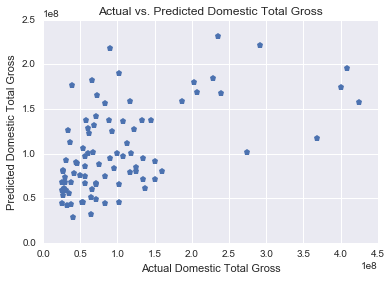

In [123]:
plt.plot(y, y_pred4, 'p')
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs. Predicted Domestic Total Gross');

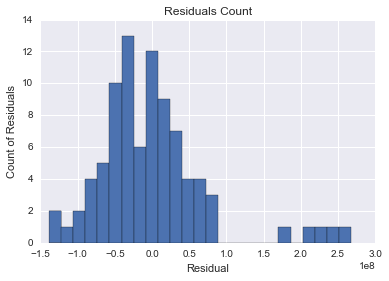

In [124]:
residuals = y - y_pred4
plt.hist(residuals, bins = 25)
plt.xlabel('Residual')
plt.ylabel('Count of Residuals')
plt.title('Residuals Count')

When adding Runtime, we saw our adjusted-R squared go down. It would be nice to run more predictors like Genre or how many theatres the movie was release in, but that isn't possible with this data set. 

---

### Exercise 3.5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [147]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.25)
y_pred = fit1.predict(X_test)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

-0.11468755638574191

In [148]:
lm1 = smf.OLS(y_train, X_train)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     7.906
Date:                Fri, 14 Oct 2016   Prob (F-statistic):           3.46e-05
Time:                        17:04:50   Log-Likelihood:                -1271.7
No. Observations:                  65   AIC:                             2553.
Df Residuals:                      60   BIC:                             2564.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
constant     -8.245e+06   4.94e+07     -0.167      0.868     -1.07e+08  9.05e+07
Budget           0.7969      0.210      3.800      0.000         0.377     1.216
Rating_PG     2.546e+07   2.14e+07      1.192      0.238     -1.73e+07  6.82e+07
Rating_PG-13 -2.045e+07   2.45e+07     -0.837      0.406     -6.94e+07  2.85e+07
Rating_R     -1.325e+07    2.5e+07     -0.530      0.598     -6.33e+07  3.68e+07
Runtime       5.555e+05   6.32e+05      0.879      0.383     -7.08e+05  1.82e+06
==============================================================================
Omnibus:                       27.099   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.956
Skew:                           1.452   Prob(JB):                     2.34e-11
Kurtosis:                       6.106   Cond. No.                     1.26e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

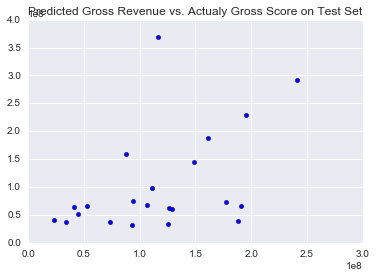

In [145]:
plt.scatter(y_pred, y_test)
plt.title('Predicted Gross Revenue vs. Actual Gross Score on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.plot(np.unique(y_pred), np.poly1d())